In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('hotels.csv')

In [4]:
from missingno import matrix
import pytimetk as ptk

In [49]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [50]:
#is_canceled count and proportion
is_canceled_count = df['is_canceled'].value_counts()
is_canceled_proportion = df['is_canceled'].value_counts(normalize=True)

is_canceled_count, is_canceled_proportion


(is_canceled
 0    75166
 1    44224
 Name: count, dtype: int64,
 is_canceled
 0    0.629584
 1    0.370416
 Name: proportion, dtype: float64)

In [51]:
#how much does it cost the hotel in this time frame
cost = 44224 * 200 * 3.5 #average night 200$ and average stay 3.5 nights

print(f'The hotel lost ${cost/1000000} million in 3 Years due to cancellations')

#saving if we are able to solve 10% of the cancellations
savings = 44224 * 200 * 3.5 * 0.1 

print(f'The hotel could potentially save ${round(savings/(1000000*3),2)} million in per Year due to reduction in cancellations')


The hotel lost $30.9568 million in 3 Years due to cancellations
The hotel could potentially save $1.03 million in per Year due to reduction in cancellations


In [52]:
# Adding new features
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_guests']=df['adults']+df['children']+df['babies']
df['diffrent_room_assigned'] = np.where(df['assigned_room_type'] == df['reserved_room_type'], 0, 1)

#dropping original columns
df.drop(
    columns=[
        'stays_in_weekend_nights',
        'stays_in_week_nights',
        'adults','children',
        'babies',
        'assigned_room_type',
        'reserved_room_type'
        ], 
        axis=1, inplace=True
        )

df.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119390 rows of 28 columns
hotel:                           object            ['Resort Hotel', 'Res ...
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
arrival_date_year:               int64             [2015, 2015, 2015, 20 ...
arrival_date_month:              object            ['July', 'July', 'Jul ...
arrival_date_week_number:        int64             [27, 27, 27, 27, 27,  ...
arrival_date_day_of_month:       int64             [1, 1, 1, 1, 1, 1, 1, ...
meal:                            object            ['BB', 'BB', 'BB', 'B ...
country:                         object            ['PRT', 'PRT', 'GBR', ...
market_segment:                  object            ['Direct', 'Direct',  ...
distribution_channel:            object            ['Direct', 'Direct',  ...
is_repeated_guest:               int64             [0, 0, 0, 0, 0, 0, 0, ...
previous_ca

<Axes: >

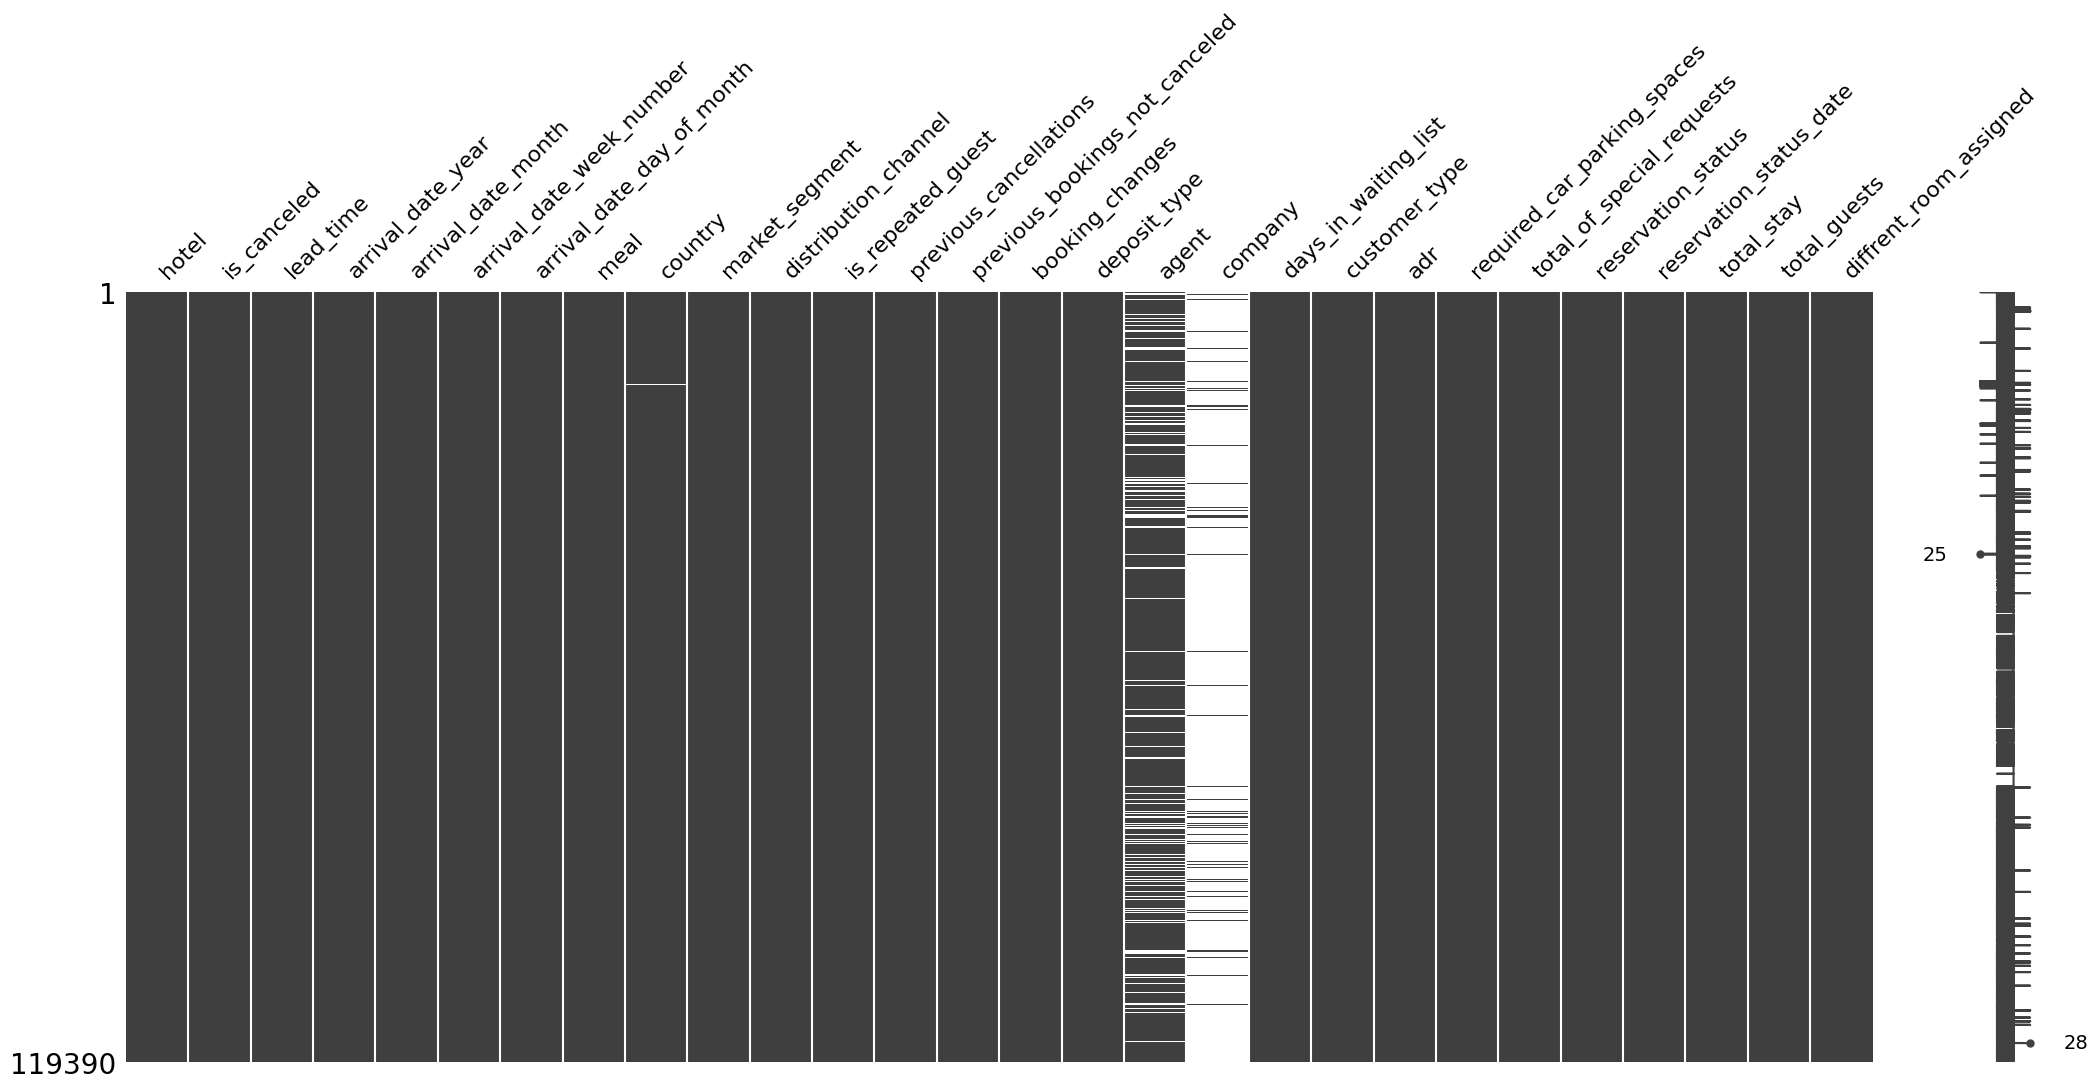

In [53]:
#missing values using missingno
matrix(df)

In [54]:
#drop agent and company columns
df = df.drop(columns=['agent', 'company'])

#fill country with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

#drop rows with missing values
df = df.dropna()



In [55]:
#null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
total_stay                        0
total_guests                      0
diffrent_room_assigned            0
dtype: int64

# Correlation   

In [58]:
#binarize
df_binarize = df.binarize()

In [63]:
df_binarize.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 106 columns
lead_time__0.0_18.0:                     int64             [0, 0, 1, 1,  ...
lead_time__18.0_69.0:                    int64             [0, 0, 0, 0,  ...
lead_time__69.0_160.0:                   int64             [0, 0, 0, 0,  ...
lead_time__160.0_737.0:                  int64             [1, 1, 0, 0,  ...
arrival_date_week_number__1.0_16.0:      int64             [0, 0, 0, 0,  ...
arrival_date_week_number__16.0_28.0:     int64             [1, 1, 1, 1,  ...
arrival_date_week_number__28.0_38.0:     int64             [0, 0, 0, 0,  ...
arrival_date_week_number__38.0_53.0:     int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__1.0_8.0:      int64             [1, 1, 1, 1,  ...
arrival_date_day_of_month__8.0_16.0:     int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__16.0_23.0:    int64             [0, 0, 0, 0,  ...
arrival_date_day_of_month__23.0_31.0:    int64             [0, 0, 0, 0,  ...
adr__-6.4_

In [65]:
df_corr = df_binarize.correlate(target='is_canceled__1')
df_corr.head(10)

,feature,bin,correlation
25,is_canceled,1,1.000000
24,is_canceled,0,-1.000000
100,reservation_status,Check-Out,-1.000000
99,reservation_status,Canceled,0.978433
84,deposit_type,Non Refund,0.481488
83,deposit_type,No Deposit,-0.477942
58,country,PRT,0.331560
73,previous_cancellations,1,0.274606
72,previous_cancellations,0,-0.270962
0,lead_time,0.0_18.0,-0.270429


In [66]:
#visualize the correlation
df_corr.plot_correlation_funnel()

In [70]:
#subset features
df_subset = df.drop(columns=['reservation_status'])

#selecting specific columns
df_subset = df[['is_canceled','deposit_type','country','previous_cancellations','lead_time','total_of_special_requests','diffrent_room_assigned',\
                'market_segment','required_car_parking_spaces','distribution_channel','hotel','customer_type','previous_bookings_not_canceled',\
                'is_repeated_guest']]

In [71]:
#creating new columns based on 'country' column
df_subset['country_PRT'] = np.where(df_subset['country'] == 'PRT', 1, 0)
df_subset['country_other'] = np.where(df_subset['country'] != 'PRT', 1, 0)

#drop original column
df_subset = df_subset.drop(columns=['country'])



In [5]:
# #writing the final dataframe to a csv file
# df_subset.to_csv('hotels_subset.csv', index=False)

#reading the final dataframe from a csv file
hotel_df_subset = pd.read_csv('hotels_subset.csv')
hotel_df_subset.glimpse()


<class 'pandas.core.frame.DataFrame'>: 119386 rows of 15 columns
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
deposit_type:                    object            ['No Deposit', 'No De ...
previous_cancellations:          int64             [0, 0, 0, 0, 0, 0, 0, ...
lead_time:                       int64             [342, 737, 7, 13, 14, ...
total_of_special_requests:       int64             [0, 0, 0, 0, 1, 1, 0, ...
diffrent_room_assigned:          int64             [0, 0, 1, 0, 0, 0, 0, ...
market_segment:                  object            ['Direct', 'Direct',  ...
required_car_parking_spaces:     int64             [0, 0, 0, 0, 0, 0, 0, ...
distribution_channel:            object            ['Direct', 'Direct',  ...
hotel:                           object            ['Resort Hotel', 'Res ...
customer_type:                   object            ['Transient', 'Transi ...
previous_bookings_not_canceled:  int64             [0, 0, 0, 0, 0, 0, 0, ...
is_repeated

In [6]:
#Causal Hypothesis
#Hypothesis 1: Will reduce in lead time reduce the number of cancellations?
# Good, this is within our control.


#Simple Logistic Model
import statsmodels.api as sm

#preparing the data
lead_time_df = hotel_df_subset[['is_canceled','lead_time']].copy()
lead_time_df['lead_time_binned']=pd.qcut(lead_time_df['lead_time'], q=4, duplicates='drop')

#one hot encoding(with dropping the first category to avoid multicollinearity)
lead_time_dummies = pd.get_dummies(lead_time_df['lead_time_binned'], drop_first=True)

X = lead_time_dummies.astype(float)
y = lead_time_df['is_canceled'].astype(float)

#add a constant to the imodel(intercept)    
X = sm.add_constant(X)

#fir the model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.608661
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119382
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                 0.07662
Time:                        19:11:19   Log-Likelihood:                -72666.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7643      0.016   -108.441      0.000      -1.796      -1.732
(18.0, 69.0]     

This is explaining 7% (R-Sq = 0.07662) of the variance in the target variable. So we will amke a more advanced model to predict the target variable.

In [7]:
#accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = result.predict(X)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6567771765533648


In [8]:
df = hotel_df_subset.copy()
df['lead_time_binned']=pd.qcut(df['lead_time'], q=4, duplicates='drop')
df = df.drop(columns=['lead_time'])
df.glimpse()
print("-----------------")
df = pd.get_dummies(df, drop_first=True)
df.glimpse()

#convert all dummy variables to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

print("-----------------")
df.glimpse()






<class 'pandas.core.frame.DataFrame'>: 119386 rows of 15 columns
is_canceled:                     int64             [0, 0, 0, 0, 0, 0, 0, ...
deposit_type:                    object            ['No Deposit', 'No De ...
previous_cancellations:          int64             [0, 0, 0, 0, 0, 0, 0, ...
total_of_special_requests:       int64             [0, 0, 0, 0, 1, 1, 0, ...
diffrent_room_assigned:          int64             [0, 0, 1, 0, 0, 0, 0, ...
market_segment:                  object            ['Direct', 'Direct',  ...
required_car_parking_spaces:     int64             [0, 0, 0, 0, 0, 0, 0, ...
distribution_channel:            object            ['Direct', 'Direct',  ...
hotel:                           object            ['Resort Hotel', 'Res ...
customer_type:                   object            ['Transient', 'Transi ...
previous_bookings_not_canceled:  int64             [0, 0, 0, 0, 0, 0, 0, ...
is_repeated_guest:               int64             [0, 0, 0, 0, 0, 0, 0, ...
country_PRT

In [9]:
#import GLM model
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.model_selection import train_test_split

#split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


#prepare the data
X_train = train_df.drop(columns='is_canceled')
y_train = train_df['is_canceled']

X_test = test_df.drop(columns='is_canceled')
y_test = test_df['is_canceled']

#fit the model
model = GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial(), link=sm.families.links.logit())
result = model.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=1) #L1_wt=1 for Lasso and L1_wt=0 for Ridge



In [88]:
#adding constant to the test data
X_test = sm.add_constant(X_test)

#predict the test data
predicted_probabilities = result.predict(X_test)

#calculate ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predicted_probabilities)
print(f'ROC AUC: {roc_auc}')

X_test = X_test.drop(columns='const')

#print the summary
pd.DataFrame(result.params)

ROC AUC: 0.8648838468854644


,0
const,-0.043943
previous_cancellations,0.173032
total_of_special_requests,-0.534082
diffrent_room_assigned,-1.142305
required_car_parking_spaces,-0.769239
previous_bookings_not_canceled,-0.112318
is_repeated_guest,0.000000
country_PRT,0.000000
country_other,-1.162500
deposit_type_Non Refund,2.183597


In [89]:
np.exp(0.40), np.exp(0)

(1.4918246976412703, 1.0)

If we can reduce the lead_time bucket from (160, 737) to (18,69) we will able to reduce the risk of cancellation from 1.5X to 1X

# CasualML

In [14]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor
from causalml.inference.meta import BaseRRegressor
from xgboost import XGBRegressor

In [10]:
#using X_train, y_train, X_test, y_test from the previous code cell
#making copies

X = df.drop(columns='is_canceled')
y = df['is_canceled']


In [11]:
X.glimpse()

<class 'pandas.core.frame.DataFrame'>: 119386 rows of 27 columns
previous_cancellations:           int64             [0, 0, 0, 0, 0, 0, 0 ...
total_of_special_requests:        int64             [0, 0, 0, 0, 1, 1, 0 ...
diffrent_room_assigned:           int64             [0, 0, 1, 0, 0, 0, 0 ...
required_car_parking_spaces:      int64             [0, 0, 0, 0, 0, 0, 0 ...
previous_bookings_not_canceled:   int64             [0, 0, 0, 0, 0, 0, 0 ...
is_repeated_guest:                int64             [0, 0, 0, 0, 0, 0, 0 ...
country_PRT:                      int64             [1, 1, 0, 0, 0, 0, 1 ...
country_other:                    int64             [0, 0, 1, 1, 1, 1, 0 ...
deposit_type_Non Refund:          int64             [0, 0, 0, 0, 0, 0, 0 ...
deposit_type_Refundable:          int64             [0, 0, 0, 0, 0, 0, 0 ...
market_segment_Complementary:     int64             [0, 0, 0, 0, 0, 0, 0 ...
market_segment_Corporate:         int64             [0, 0, 0, 1, 0, 0, 0 ...
market_segm

In [12]:
#Making treatment
treatment = np.where(X['lead_time_binned_(18.0, 69.0]'] == 1, 1, 0)
X = X.drop(columns='lead_time_binned_(18.0, 69.0]')


#e : propensity score model
from sklearn.linear_model import LogisticRegression

# Assuming X contains the covariates and 'treatment' is the treatment assignment
log_reg = LogisticRegression()
log_reg.fit(X, treatment)

# The predicted probabilities of receiving the treatment
e = log_reg.predict_proba(X)[:, 1]  # get the probability of the 1 class (treatment)


# Average Treatment Effect Estimation with S, T, X and R Learners


In [15]:
lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X, treatment, y)
print('Average Treatment Effect (ATE): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

xg= XGBTRegressor(random_state=42)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (ATE): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

nn = MLPTRegressor(hidden_layer_sizes=(10, 10),
                    learning_rate_init=.1,
                    early_stopping=True,
                    random_state=42)

te, lb, ub = nn.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Neural Network (MLP)): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))


Average Treatment Effect (ATE): 0.18 (0.17, 0.18)
Average Treatment Effect (ATE): 0.05 (0.04, 0.05)
Average Treatment Effect (Neural Network (MLP)): 0.06 (0.05, 0.06)


# Interpretable Causal ML

In [16]:
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor

from lightgbm import LGBMRegressor  # For the LGBMRegressor
from sklearn.ensemble import RandomForestRegressor 


In [17]:
w_multi = np.where(treatment == 1, 'treatment_A', 'control') 

In [18]:
slearner = BaseSRegressor(LGBMRegressor(), control_name='control')
slearner.estimate_ate(X, w_multi, y)
slearner_tau = slearner.fit_predict(X, w_multi, y)

model_tau_feature = RandomForestRegressor()

feature_names = X.columns

slearner.get_importance(X=X, tau=slearner_tau, model_tau_feature=model_tau_feature,
                        normalize=True, method='auto', features=feature_names)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 119386, number of used features: 26
[LightGBM] [Info] Start training from score 0.370395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 119386, number of used features: 26
[LightGBM] [Info] Start training from score 0.370395


{'treatment_A': lead_time_binned_(69.0, 160.0]     2.350409e-01
 lead_time_binned_(160.0, 737.0]    1.218349e-01
 diffrent_room_assigned             1.040476e-01
 total_of_special_requests          9.061793e-02
 country_PRT                        8.018217e-02
 market_segment_Online TA           7.109209e-02
 required_car_parking_spaces        6.067959e-02
 deposit_type_Non Refund            5.847420e-02
 hotel_Resort Hotel                 3.106754e-02
 customer_type_Transient            2.962839e-02
 country_other                      2.423943e-02
 previous_cancellations             1.644792e-02
 previous_bookings_not_canceled     1.464403e-02
 distribution_channel_TA/TO         1.370278e-02
 market_segment_Direct              1.258314e-02
 is_repeated_guest                  1.227890e-02
 market_segment_Offline TA/TO       9.050666e-03
 market_segment_Corporate           3.557508e-03
 market_segment_Groups              3.117201e-03
 market_segment_Complementary       2.634410e-03
 dist

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

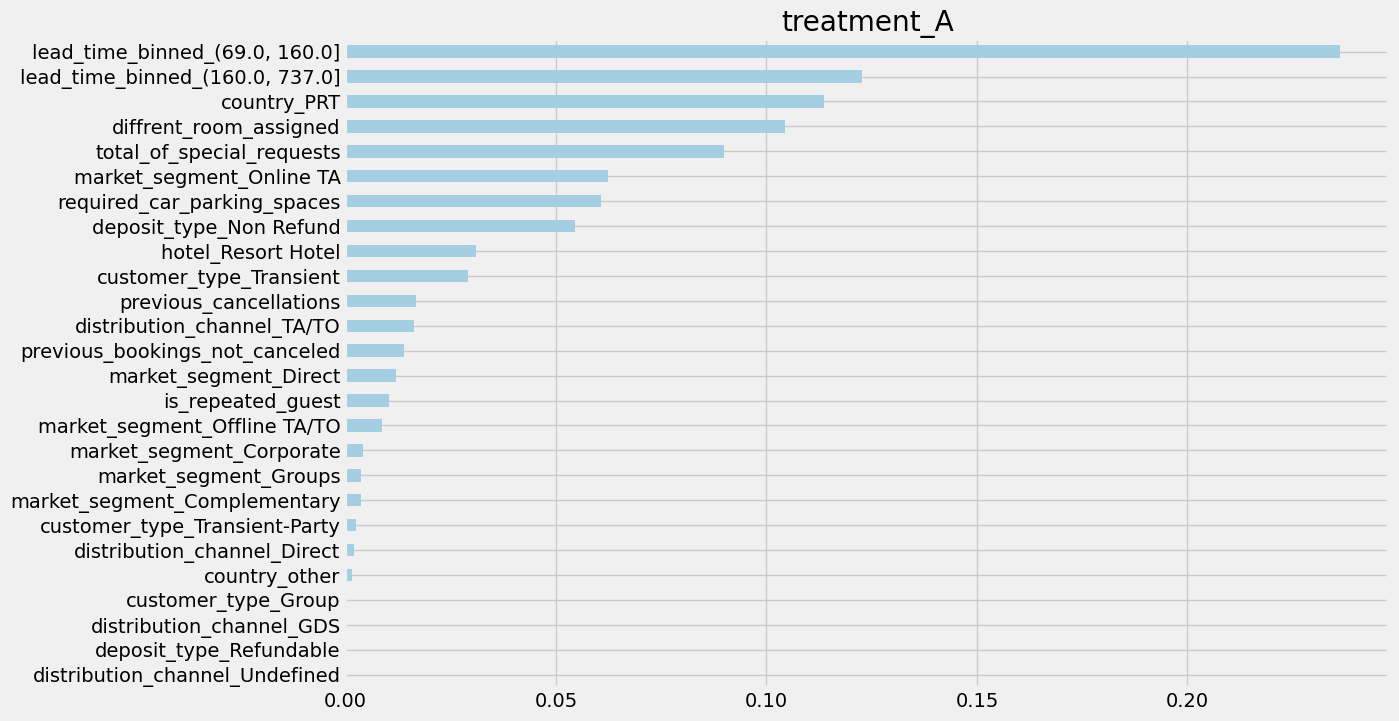

In [21]:
# Using the feature_importances_ method in the base learner (LGBMRegressor() in this example)
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='auto', features=feature_names)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

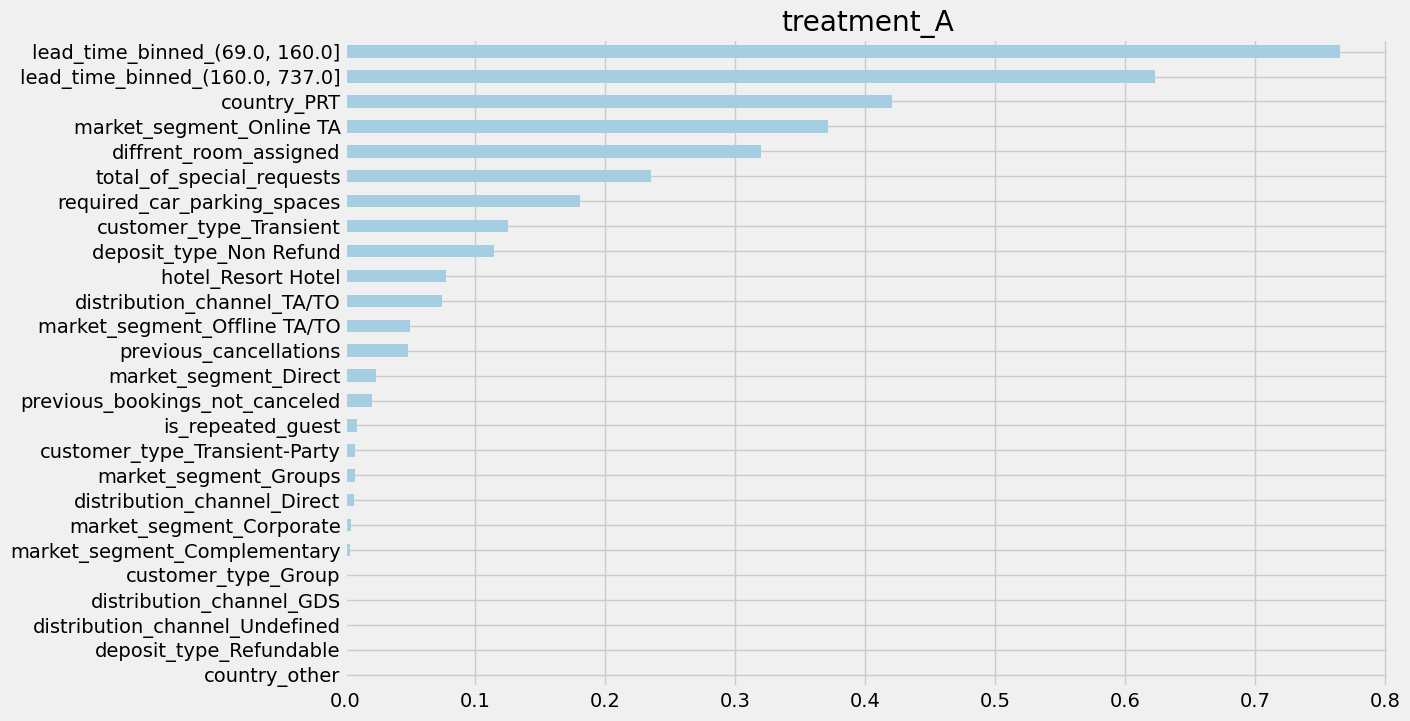

In [22]:
# Using eli5's PermutationImportance
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='permutation', features=feature_names)

In [23]:
# Using SHAP
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau, features=feature_names)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

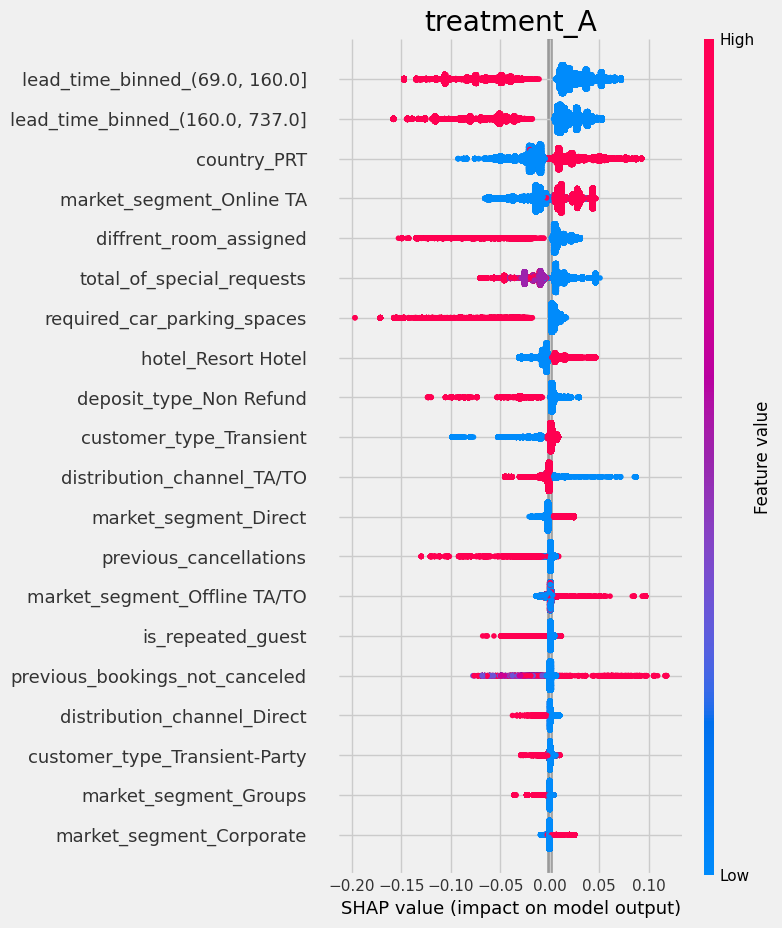

In [25]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

In [ ]:


# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
slearner.plot_shap_dependence(treatment_group='treatment_A',
feature_idx=1,
X=X,
tau=slearner_tau,
interaction_idx='auto')

# Uplift Tree Visualization